In [45]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_fit(x, y, degree, num_points=None):
    if num_points is None:
        num_points = len(x)  # Используем все точки по умолчанию

    # Выбираем только первые num_points точек для аппроксимации
    x_subset = x[:num_points]
    y_subset = y[:num_points]

    # Создаем матрицу X со степенями x_subset
    X = np.vander(x_subset, degree + 1)

    # Решаем уравнение X^T * X * coeffs = X^T * y_subset для coeffs
    # Решение этой системы линейных уравнений производится для получения коэффициентов coeffs.
    coeffs = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_subset))

    return coeffs

degree = 3 # У нас все должно быть линейно

[ 2.46666667e-03 -1.36714286e-01  2.63476190e+00 -2.84000000e+00] [ 2.66666667e-04 -2.85714286e-02  1.01047619e+00 -6.40000000e-01] [ 1.86666667e-03 -1.05714286e-01  2.30476190e+00 -2.38000000e+00]


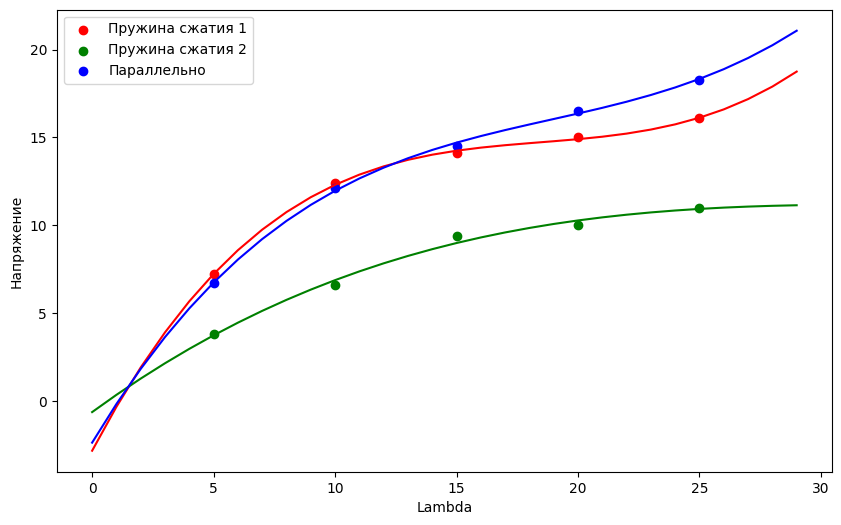

In [46]:
# Пружины сжатия
Lambda_1 = [5, 10, 15, 20, 25]

# Пружина сжатия 1
P_1 = [7.2, 12.4, 14.1, 15, 16.1]

# Пружина сжатия 2
P_2 = [3.8, 6.6, 9.4, 10, 11]

# Параллельное соединение
P_both = [6.7, 12.1, 14.5, 16.5, 18.3]

# Коэффециенты для всех случаев
coeffs_1 = least_squares_fit(Lambda_1, P_1, degree)
coeffs_2 = least_squares_fit(Lambda_1, P_2, degree)
coeffs_3 = least_squares_fit(Lambda_1, P_both, degree)

print(coeffs_1, coeffs_2, coeffs_3)

# Полиномы для всех случаев
poly_1 = np.poly1d(coeffs_1)
poly_2 = np.poly1d(coeffs_2)
poly_3 = np.poly1d(coeffs_3)

# Создаем последовательность по которой аппроксимируем
Lambda_range = np.arange(0, 30, 1)
P_1_approximated = poly_1(Lambda_range)
P_2_approximated = poly_2(Lambda_range)
P_both_approximated = poly_3(Lambda_range)


plt.figure(figsize=(10, 6))
plt.scatter(Lambda_1, P_1, label='Пружина сжатия 1', color='red')
plt.scatter(Lambda_1, P_2, label='Пружина сжатия 2', color='green')
plt.scatter(Lambda_1, P_both, label='Параллельно', color='blue')
plt.legend()

plt.plot(Lambda_range, P_1_approximated, color='red')
plt.plot(Lambda_range, P_2_approximated, color='green')
plt.plot(Lambda_range, P_both_approximated,  color='blue')


plt.xlabel('Lambda')
plt.ylabel('Напряжение')
plt.show()

In [13]:
# Пружины растяжения
Lambda_2 = [10, 20, 30, 40, 50]

# Пружина растяжения 1
p_1 = [5.0, 9.7, 14.7, 19.1, 24]

# Пружина растяжения 2
p_2 = [2.5, 4.5, 6.3, 8.2, 10.1]

# Последовательное соединение
p_both = [6.7, 12.1, 14.5, 16.5, 18.3]